ConCall Tag Cloud

In [ ]:
pip install PyPDF2 wordcloud


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import os
import requests
# Load the dataset (update 'file_path' to the actual CSV file path)
file_path = "/content/drive/My Drive/IIIT-DATA/SEM3/BD-DSC613/covid.csv"
covid_data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# URL of the PDF
pdf_url = "https://duzycfafl38re.cloudfront.net/EdgeReports/PDFs/EdgeReport_LTIM_ConcallAnalysis_17_10_2024_579.pdf"
output_path = "EdgeReport_LTIM_ConcallAnalysis.pdf"

# Download the PDF file
response = requests.get(pdf_url)

# Save the PDF file locally
if response.status_code == 200:
    with open(output_path, "wb") as file:
        file.write(response.content)
    print(f"PDF downloaded successfully and saved to {output_path}")
else:
    print(f"Failed to download PDF. Status code: {response.status_code}")


PDF downloaded successfully and saved to EdgeReport_LTIM_ConcallAnalysis.pdf


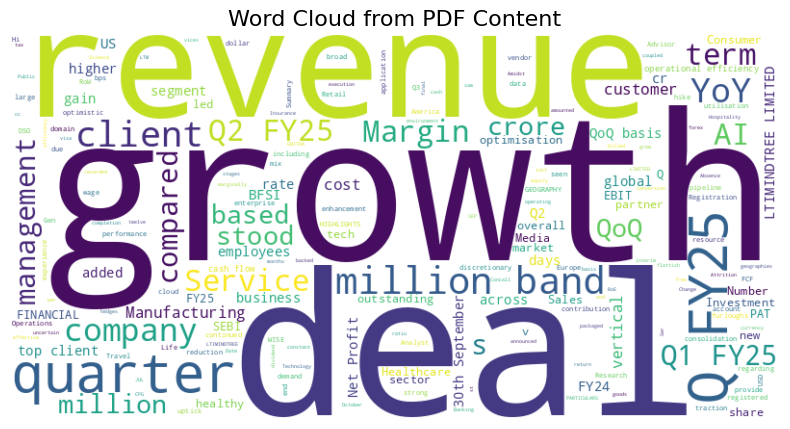

In [ ]:
import PyPDF2
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to extract text from a PDF file
def extract_text_from_pdf(file_path):
    pdf_text = ""
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            pdf_text += page.extract_text()
    return pdf_text

# Path to your PDF file
pdf_file_path = 'EdgeReport_LTIM_ConcallAnalysis.pdf'

# Extract text from the PDF
text = extract_text_from_pdf(pdf_file_path)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from PDF Content', fontsize=16)
plt.show()
